## Dataset Information
#### The data set contains the recordings of 16 chemical sensors exposed to two dynamic gas mixtures at varying concentrations. For each mixture, signals were acquired continuously during 12 hours.
### Dataset Characteristics

* Multivariate, Time-Series
* Associated Tasks : Classification, Regression
* Feature Type: Real
* Instances : 4178504
* Dimentions : 19

## Additional Information
This data set contains the acquired time series from 16 chemical sensors exposed to gas mixtures at varying concentration levels. In particular, we generated two gas mixtures: Ethylene and Methane in air, and Ethylene and CO in air. Each measurement was constructed by the continuous acquisition of the 16-sensor array signals for a duration of about 12 hours without interruption. 

The data set was collected in a gas delivery platform facility at the ChemoSignals Laboratory in the BioCircuits Institute, University of California San Diego. The measurement system platform provides versatility for obtaining the desired concentrations of the chemical substances of interest with high accuracy and in a highly reproducible manner. 

The sensor array included 16 chemical sensors (Figaro Inc., US) of 4 different types: TGS-2600, TGS-2602, TGS-2610, TGS-2620 (4 units of each type). The sensors were integrated with customized signal conditioning and control electronics. The operating voltage of the sensors, which controls the sensorsâ€™ operating temperature, was kept constant at 5 V for the whole duration of the experiments. The sensorsâ€™ conductivities were acquired continuously at a sampling frequency of 100 Hz. The sensor array was placed in a 60 ml measurement chamber, where the gas sample was injected at a constant flow of 300 ml/min.

Each measurement was constructed by the continuous acquisition of the 16-sensor array signals while concentration levels changed randomly. For each measurement (each gas mixture), the signals were acquired continuously for about 12 hours without interruption. 

The concentration transitions were set at random times (in the interval 80-120s) and to random concentration levels. The data set was constructed such that all possible transitions are present: increasing, decreasing, or setting to zero the concentration of one volatile while the concentration of the other volatile is kept constant (either at a fixed or at zero concentration level). At the beginning, ending, and approximately every 10,000 s, we inserted additional predefined concentration patterns with pure gas mixtures.

The concentration ranges for Ethylene, Methane, and CO were selected such that the induced magnitudes of the sensor responses were similar. Moreover, for gas mixtures, lower concentration levels were favored. Therefore, the multivariate response of the sensors to the presented set of stimuli is challenging since none of the configurations (single
gas or mixture presentation) can be easily identified from the magnitude of sensorsâ€™ responses. In particular Ethylene concentration ranges from 0-20 ppm; 0-600 ppm for CO; and 0-300 ppm for Methane.

More information on the generated data set can be found in Fonollosa et al. 'Reservoir Computing compensates slow response of chemosensor arrays exposed to fast varying gas concentrations in continuous monitoring'; Sensors and Actuators B, 2015. 


In [1]:
# Import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os


In [2]:

#change this with the path to the dataset
dataset_path = "/Users/moji/dataset_repo/gas_sensors_dynamic_mixtures" 

# Get the list of files and directories
files_and_dirs = os.listdir(dataset_path)

ds_list = []
# Print each item
for item in files_and_dirs:
    ds_list.append(item)
    print(item)

ethylene_methane.txt
ethylene_CO.txt


In [3]:
new_path = os.path.join(dataset_path,ds_list[1]) #change this to ds_list[1] for the other file
new_path

'/Users/moji/dataset_repo/gas_sensors_dynamic_mixtures/ethylene_CO.txt'

In [4]:
# Read the first line to get column names
with open(new_path, 'r') as file:
    header = file.readline().strip().split(',')

new_header = header[:3]  # Keep the first 3 columns as they are
new_header.extend([f'sensor {i}' for i in range(1, 17)])

new_header



['Time (seconds)',
 ' CO conc (ppm)',
 ' Ethylene conc (ppm)',
 'sensor 1',
 'sensor 2',
 'sensor 3',
 'sensor 4',
 'sensor 5',
 'sensor 6',
 'sensor 7',
 'sensor 8',
 'sensor 9',
 'sensor 10',
 'sensor 11',
 'sensor 12',
 'sensor 13',
 'sensor 14',
 'sensor 15',
 'sensor 16']

In [5]:
# Read the rest of the file with space as separator
df = pd.read_csv(new_path, sep='\s+', skiprows=1, header=None, index_col=0)

# Get the number of columns in the data
num_columns = len(df.columns)

# Extend the header list to match the number of columns
if len(header) < num_columns + 1:  # +1 because one column became the index
    header.extend([header[-1]] * (num_columns - len(header) + 1))

# Assign the column names, excluding the first one (which is now the index)
df.columns = new_header[1:]

# Convert the index from seconds to datetime
df.index = pd.to_datetime(df.index, unit='s')

# col_to_drop = [" CO conc (ppm)"," Ethylene conc (ppm)"]
# df.drop(columns=col_to_drop,inplace=True)
df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_11045/2040353596.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(new_path, sep='\s+', skiprows=1, header=None, index_col=0)


,CO conc (ppm),Ethylene conc (ppm),sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9,sensor 10,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16
0,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1970-01-01 00:00:00.010,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
1970-01-01 00:00:00.010,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
1970-01-01 00:00:00.030,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
1970-01-01 00:00:00.040,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 11:41:27.510,0.0,0.0,1127.81,105.93,2117.39,2247.58,1207.59,1646.73,2089.97,2262.98,1061.70,1070.47,2570.33,2073.57,709.06,775.36,2513.75,1848.65
1970-01-01 11:41:27.520,0.0,0.0,1140.73,96.46,2105.93,2253.69,1216.39,1624.47,2073.57,2246.61,1063.89,1075.26,2580.88,2083.78,698.24,768.93,2511.20,1843.63
1970-01-01 11:41:27.530,0.0,0.0,1123.99,107.92,2111.18,2245.63,1215.36,1628.44,2085.45,2271.80,1059.31,1063.49,2583.20,2090.20,709.62,775.73,2510.18,1841.80


In [6]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
CO conc (ppm),4208261.0,127.62,160.78,0.00,0.00,0.00,266.67,533.33
Ethylene conc (ppm),4208261.0,5.32,5.62,0.00,0.00,6.67,10.00,20.00
sensor 1,4208261.0,2065.62,790.26,-52.62,1323.47,1789.09,2869.44,3553.64
sensor 2,4208261.0,506.22,1530.13,-36.49,9.12,38.89,158.90,28116.51
sensor 3,4208261.0,4372.54,1608.02,-45.04,2986.96,4494.33,5658.29,8641.34
sensor 4,4208261.0,4799.25,1733.02,-8.94,3282.31,4946.72,6178.21,9221.02
sensor 5,4208261.0,1894.96,439.54,-12.19,1503.46,1984.55,2262.74,2904.04
sensor 6,4208261.0,2214.69,435.40,-42.14,1856.65,2272.78,2566.47,3502.11
sensor 7,4208261.0,5086.64,1966.45,-23.22,3241.95,5224.88,6719.28,9883.50
sensor 8,4208261.0,5385.43,2072.38,-13.82,3448.62,5537.91,7104.20,10521.04


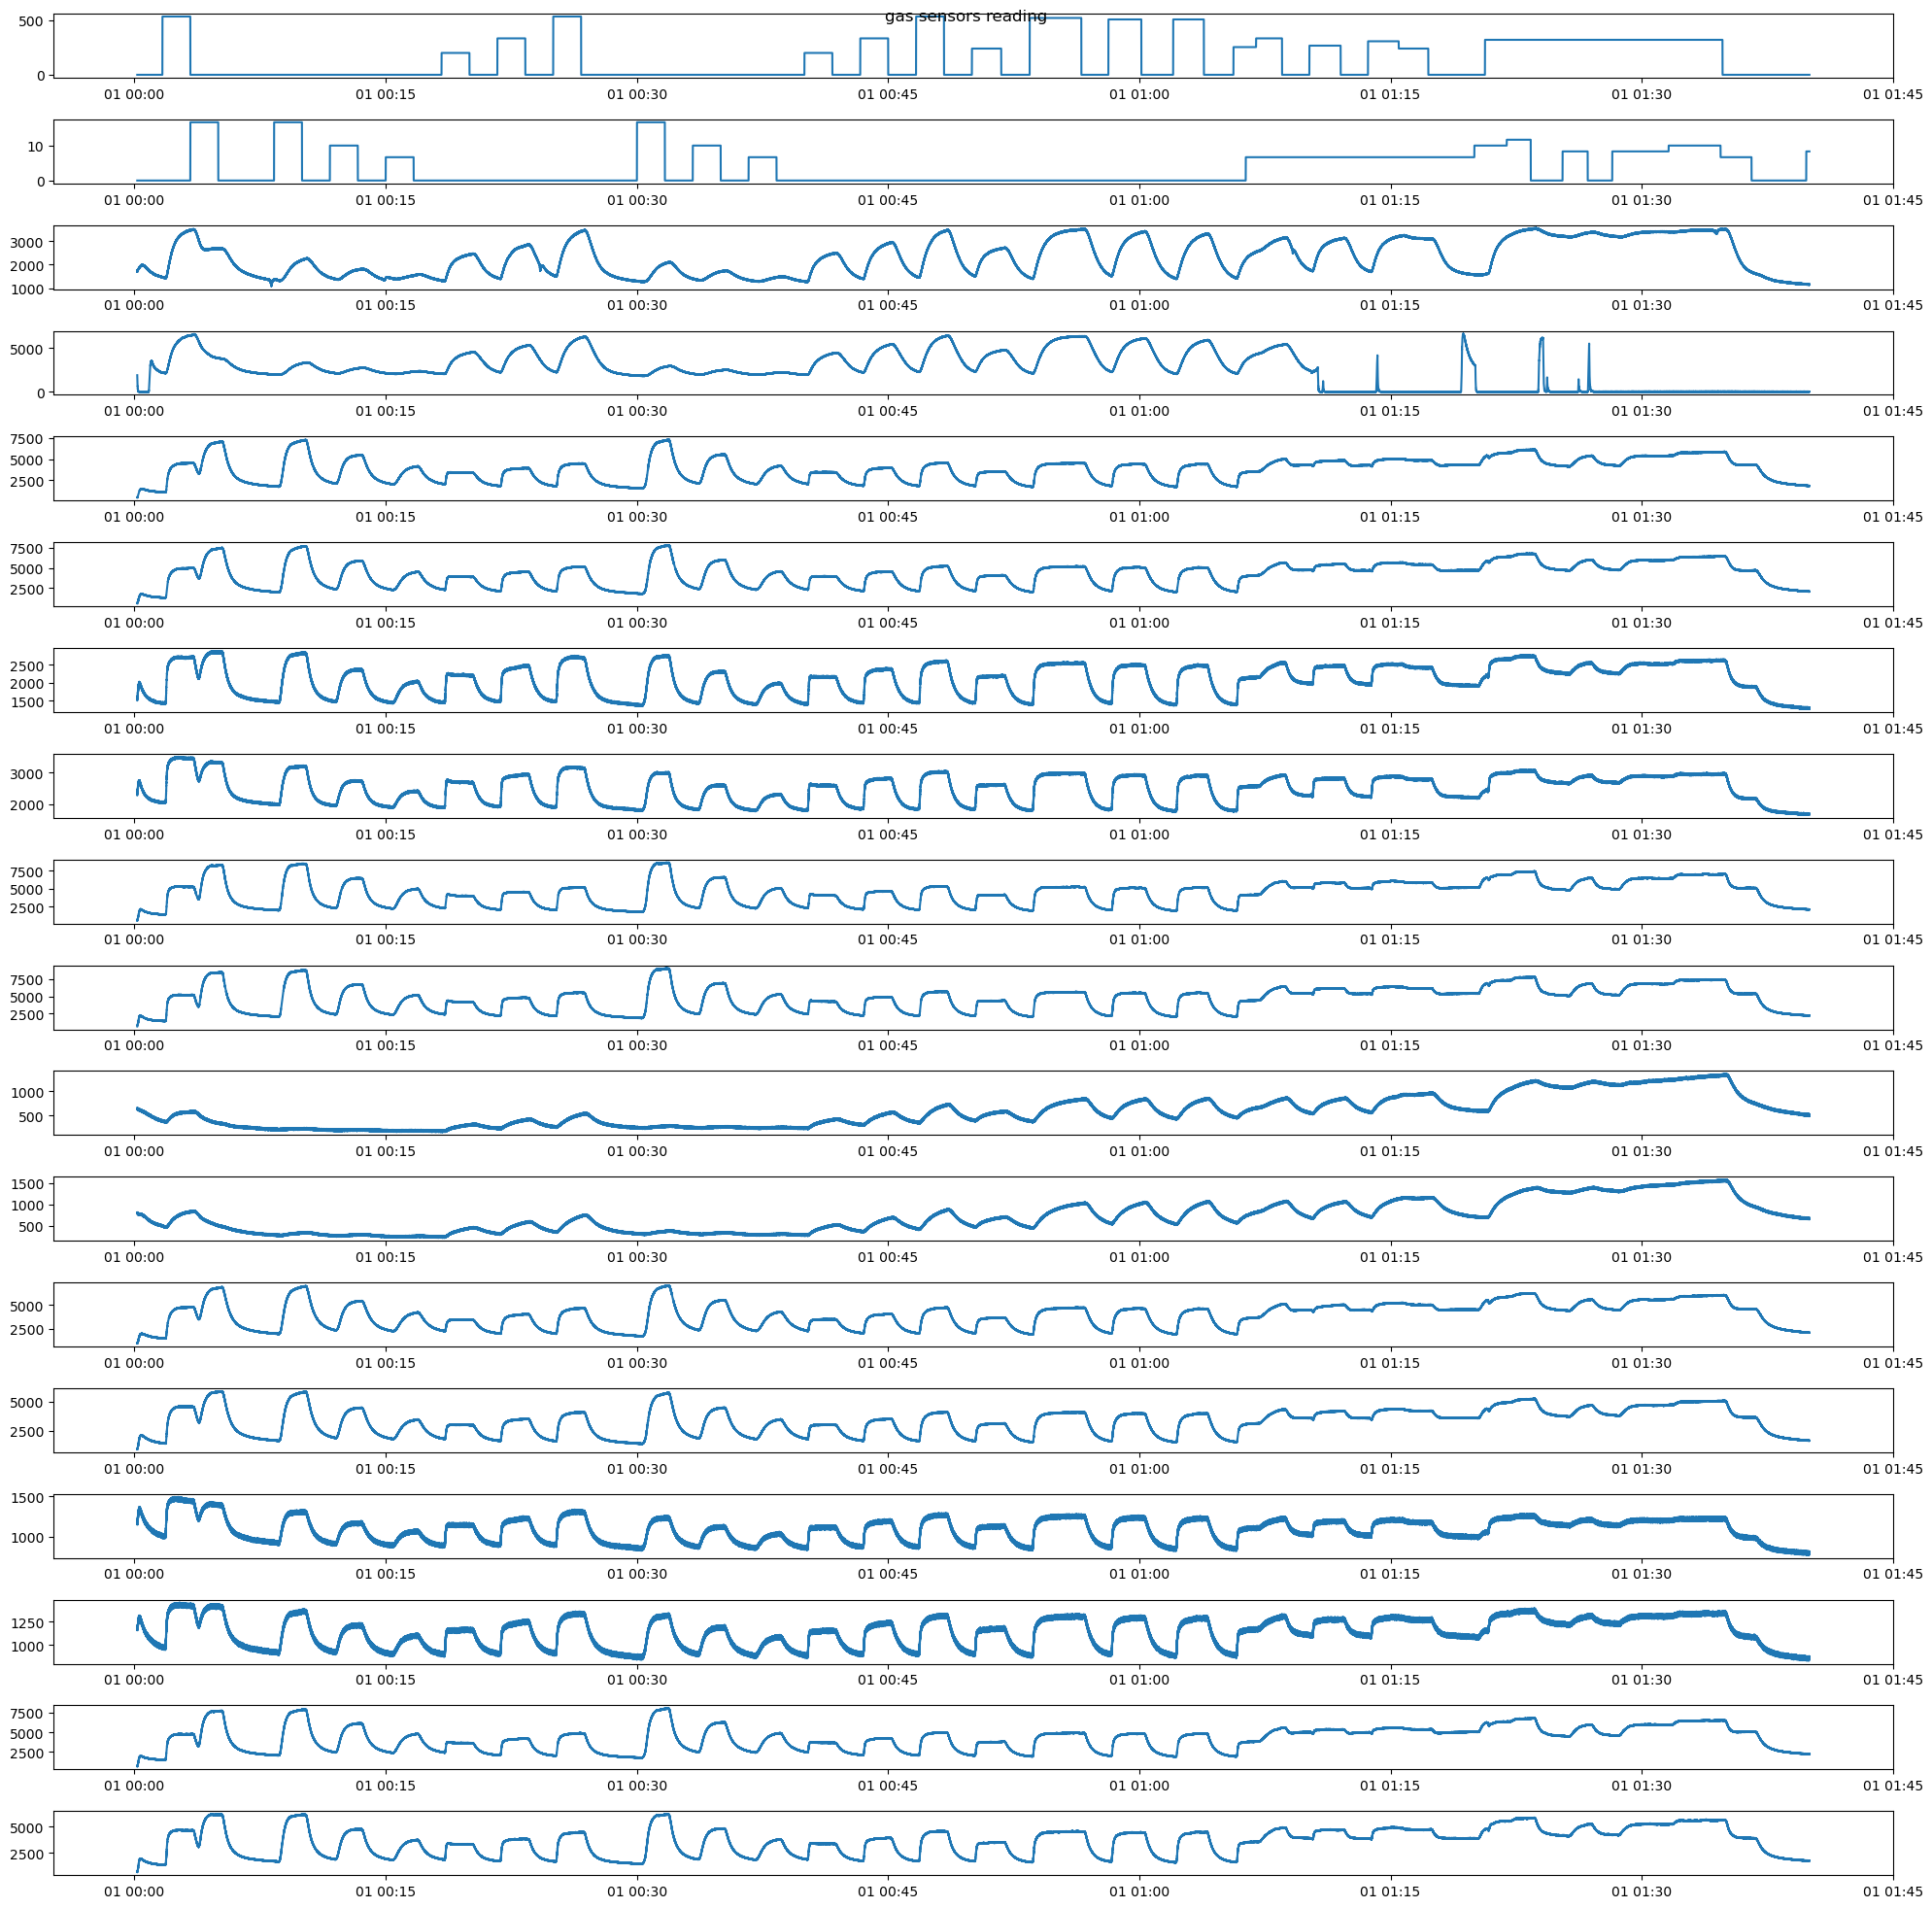

In [7]:
fig, axs = plt.subplots(18,figsize=(20, 20))
fig.suptitle('gas sensors reading')
for i in range(18):
    axs[i].plot(df.iloc[1000:600000,i])

plt.tight_layout()
plt.show()

In [8]:
# Resample to seconds frequency, taking the max of each bin
df_seconds= df.resample('s').max()
df_seconds

,CO conc (ppm),Ethylene conc (ppm),sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9,sensor 10,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16
0,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00,0.0,0.0,-31.31,37.90,-12.19,24.15,20.06,-12.84,13.36,15.49,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1970-01-01 00:00:01,0.0,0.0,50.05,257.44,4.72,33.81,41.02,28.89,14.51,27.58,10518.99,11806.57,4293.03,4412.05,7329.01,6737.95,3140.56,2856.25
1970-01-01 00:00:02,0.0,0.0,307.69,729.07,35.44,66.52,157.55,242.90,59.76,64.05,2984.76,3880.04,2516.30,2586.04,3578.80,3457.75,1754.13,1582.84
1970-01-01 00:00:03,0.0,0.0,614.33,1359.27,77.25,125.75,382.76,607.92,105.76,122.24,1531.53,2028.66,1690.61,1744.02,2235.14,2237.82,1148.61,1031.91
1970-01-01 00:00:04,0.0,0.0,904.44,1863.75,148.16,201.57,647.07,1044.00,175.05,211.24,1051.75,1414.77,1297.23,1330.15,1654.91,1714.91,848.61,758.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 11:41:23,0.0,0.0,1155.90,132.26,2130.55,2278.18,1235.26,1655.13,2134.86,2300.05,1091.25,1098.67,2608.25,2095.92,727.94,795.23,2539.54,1884.87
1970-01-01 11:41:24,0.0,0.0,1156.51,130.59,2145.89,2284.81,1246.57,1660.66,2132.46,2303.50,1088.45,1096.86,2598.17,2097.11,727.38,798.08,2553.89,1883.49
1970-01-01 11:41:25,0.0,0.0,1158.74,124.08,2141.81,2272.54,1232.38,1657.56,2120.97,2304.24,1087.25,1094.66,2600.49,2093.06,722.51,799.98,2550.56,1878.66


In [9]:
df_seconds['target'] = df_seconds[' CO conc (ppm)'] + df_seconds[' Ethylene conc (ppm)']
# Drop the old columns ' CO conc (ppm)' and ' Ethylene conc (ppm)'
df_seconds = df_seconds.drop(columns=[' CO conc (ppm)', ' Ethylene conc (ppm)'])

# Display the updated DataFrame
df_seconds

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9,sensor 10,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,target
0,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00,-31.31,37.90,-12.19,24.15,20.06,-12.84,13.36,15.49,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42,0.0
1970-01-01 00:00:01,50.05,257.44,4.72,33.81,41.02,28.89,14.51,27.58,10518.99,11806.57,4293.03,4412.05,7329.01,6737.95,3140.56,2856.25,0.0
1970-01-01 00:00:02,307.69,729.07,35.44,66.52,157.55,242.90,59.76,64.05,2984.76,3880.04,2516.30,2586.04,3578.80,3457.75,1754.13,1582.84,0.0
1970-01-01 00:00:03,614.33,1359.27,77.25,125.75,382.76,607.92,105.76,122.24,1531.53,2028.66,1690.61,1744.02,2235.14,2237.82,1148.61,1031.91,0.0
1970-01-01 00:00:04,904.44,1863.75,148.16,201.57,647.07,1044.00,175.05,211.24,1051.75,1414.77,1297.23,1330.15,1654.91,1714.91,848.61,758.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 11:41:23,1155.90,132.26,2130.55,2278.18,1235.26,1655.13,2134.86,2300.05,1091.25,1098.67,2608.25,2095.92,727.94,795.23,2539.54,1884.87,0.0
1970-01-01 11:41:24,1156.51,130.59,2145.89,2284.81,1246.57,1660.66,2132.46,2303.50,1088.45,1096.86,2598.17,2097.11,727.38,798.08,2553.89,1883.49,0.0
1970-01-01 11:41:25,1158.74,124.08,2141.81,2272.54,1232.38,1657.56,2120.97,2304.24,1087.25,1094.66,2600.49,2093.06,722.51,799.98,2550.56,1878.66,0.0


In [10]:
# Drop the first 10 seconds of data
df_seconds = df_seconds.iloc[10:]

# Reset the index if needed
df_seconds.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df_seconds

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9,sensor 10,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,target
0,1761.10,1865.13,563.05,659.08,1623.82,2404.60,684.10,832.73,660.37,815.38,995.58,1001.49,1203.50,1205.54,773.84,706.26,0.0
1,1795.65,778.57,642.46,756.11,1718.26,2500.00,838.85,1010.16,656.49,808.72,1066.68,1104.89,1235.26,1217.00,893.23,843.44,0.0
2,1818.34,295.60,732.44,866.07,1810.39,2587.33,1008.19,1213.93,649.29,799.41,1159.95,1224.58,1274.02,1245.74,1066.68,1019.44,0.0
3,1825.62,127.08,846.88,996.56,1881.42,2651.61,1204.11,1430.91,649.29,793.91,1277.33,1355.70,1297.03,1274.64,1261.41,1221.30,0.0
4,1835.19,59.27,963.01,1135.68,1955.87,2697.63,1416.68,1648.94,640.80,792.20,1409.05,1513.81,1334.33,1291.83,1466.11,1412.86,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42073,1155.90,132.26,2130.55,2278.18,1235.26,1655.13,2134.86,2300.05,1091.25,1098.67,2608.25,2095.92,727.94,795.23,2539.54,1884.87,0.0
42074,1156.51,130.59,2145.89,2284.81,1246.57,1660.66,2132.46,2303.50,1088.45,1096.86,2598.17,2097.11,727.38,798.08,2553.89,1883.49,0.0
42075,1158.74,124.08,2141.81,2272.54,1232.38,1657.56,2120.97,2304.24,1087.25,1094.66,2600.49,2093.06,722.51,799.98,2550.56,1878.66,0.0
42076,1151.85,124.08,2137.97,2278.18,1251.10,1649.82,2118.34,2301.78,1087.65,1102.88,2604.63,2100.68,725.88,798.46,2545.18,1877.51,0.0


In [11]:
df_seconds.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
sensor 1,42078.0,2089.33,791.39,1017.07,1345.21,1814.59,2894.22,3553.64
sensor 2,42078.0,534.89,1573.19,1.14,30.20,58.77,179.77,28116.51
sensor 3,42078.0,4413.30,1610.85,563.05,3031.86,4532.90,5700.30,8641.34
sensor 4,42078.0,4841.56,1735.42,659.08,3333.33,4987.92,6220.82,9221.02
sensor 5,42078.0,1925.37,439.38,1093.66,1533.48,2014.78,2292.67,2904.04
sensor 6,42078.0,2245.46,435.01,1449.87,1887.68,2303.75,2596.62,3502.11
sensor 7,42078.0,5130.48,1969.71,684.10,3298.20,5266.68,6763.07,9883.50
sensor 8,42078.0,5435.52,2076.81,832.73,3508.42,5586.00,7155.66,10521.04
sensor 9,42078.0,1206.26,427.21,194.30,954.80,1160.36,1566.64,2119.78
sensor 10,42078.0,1238.37,406.90,250.08,961.84,1196.76,1578.03,2089.01


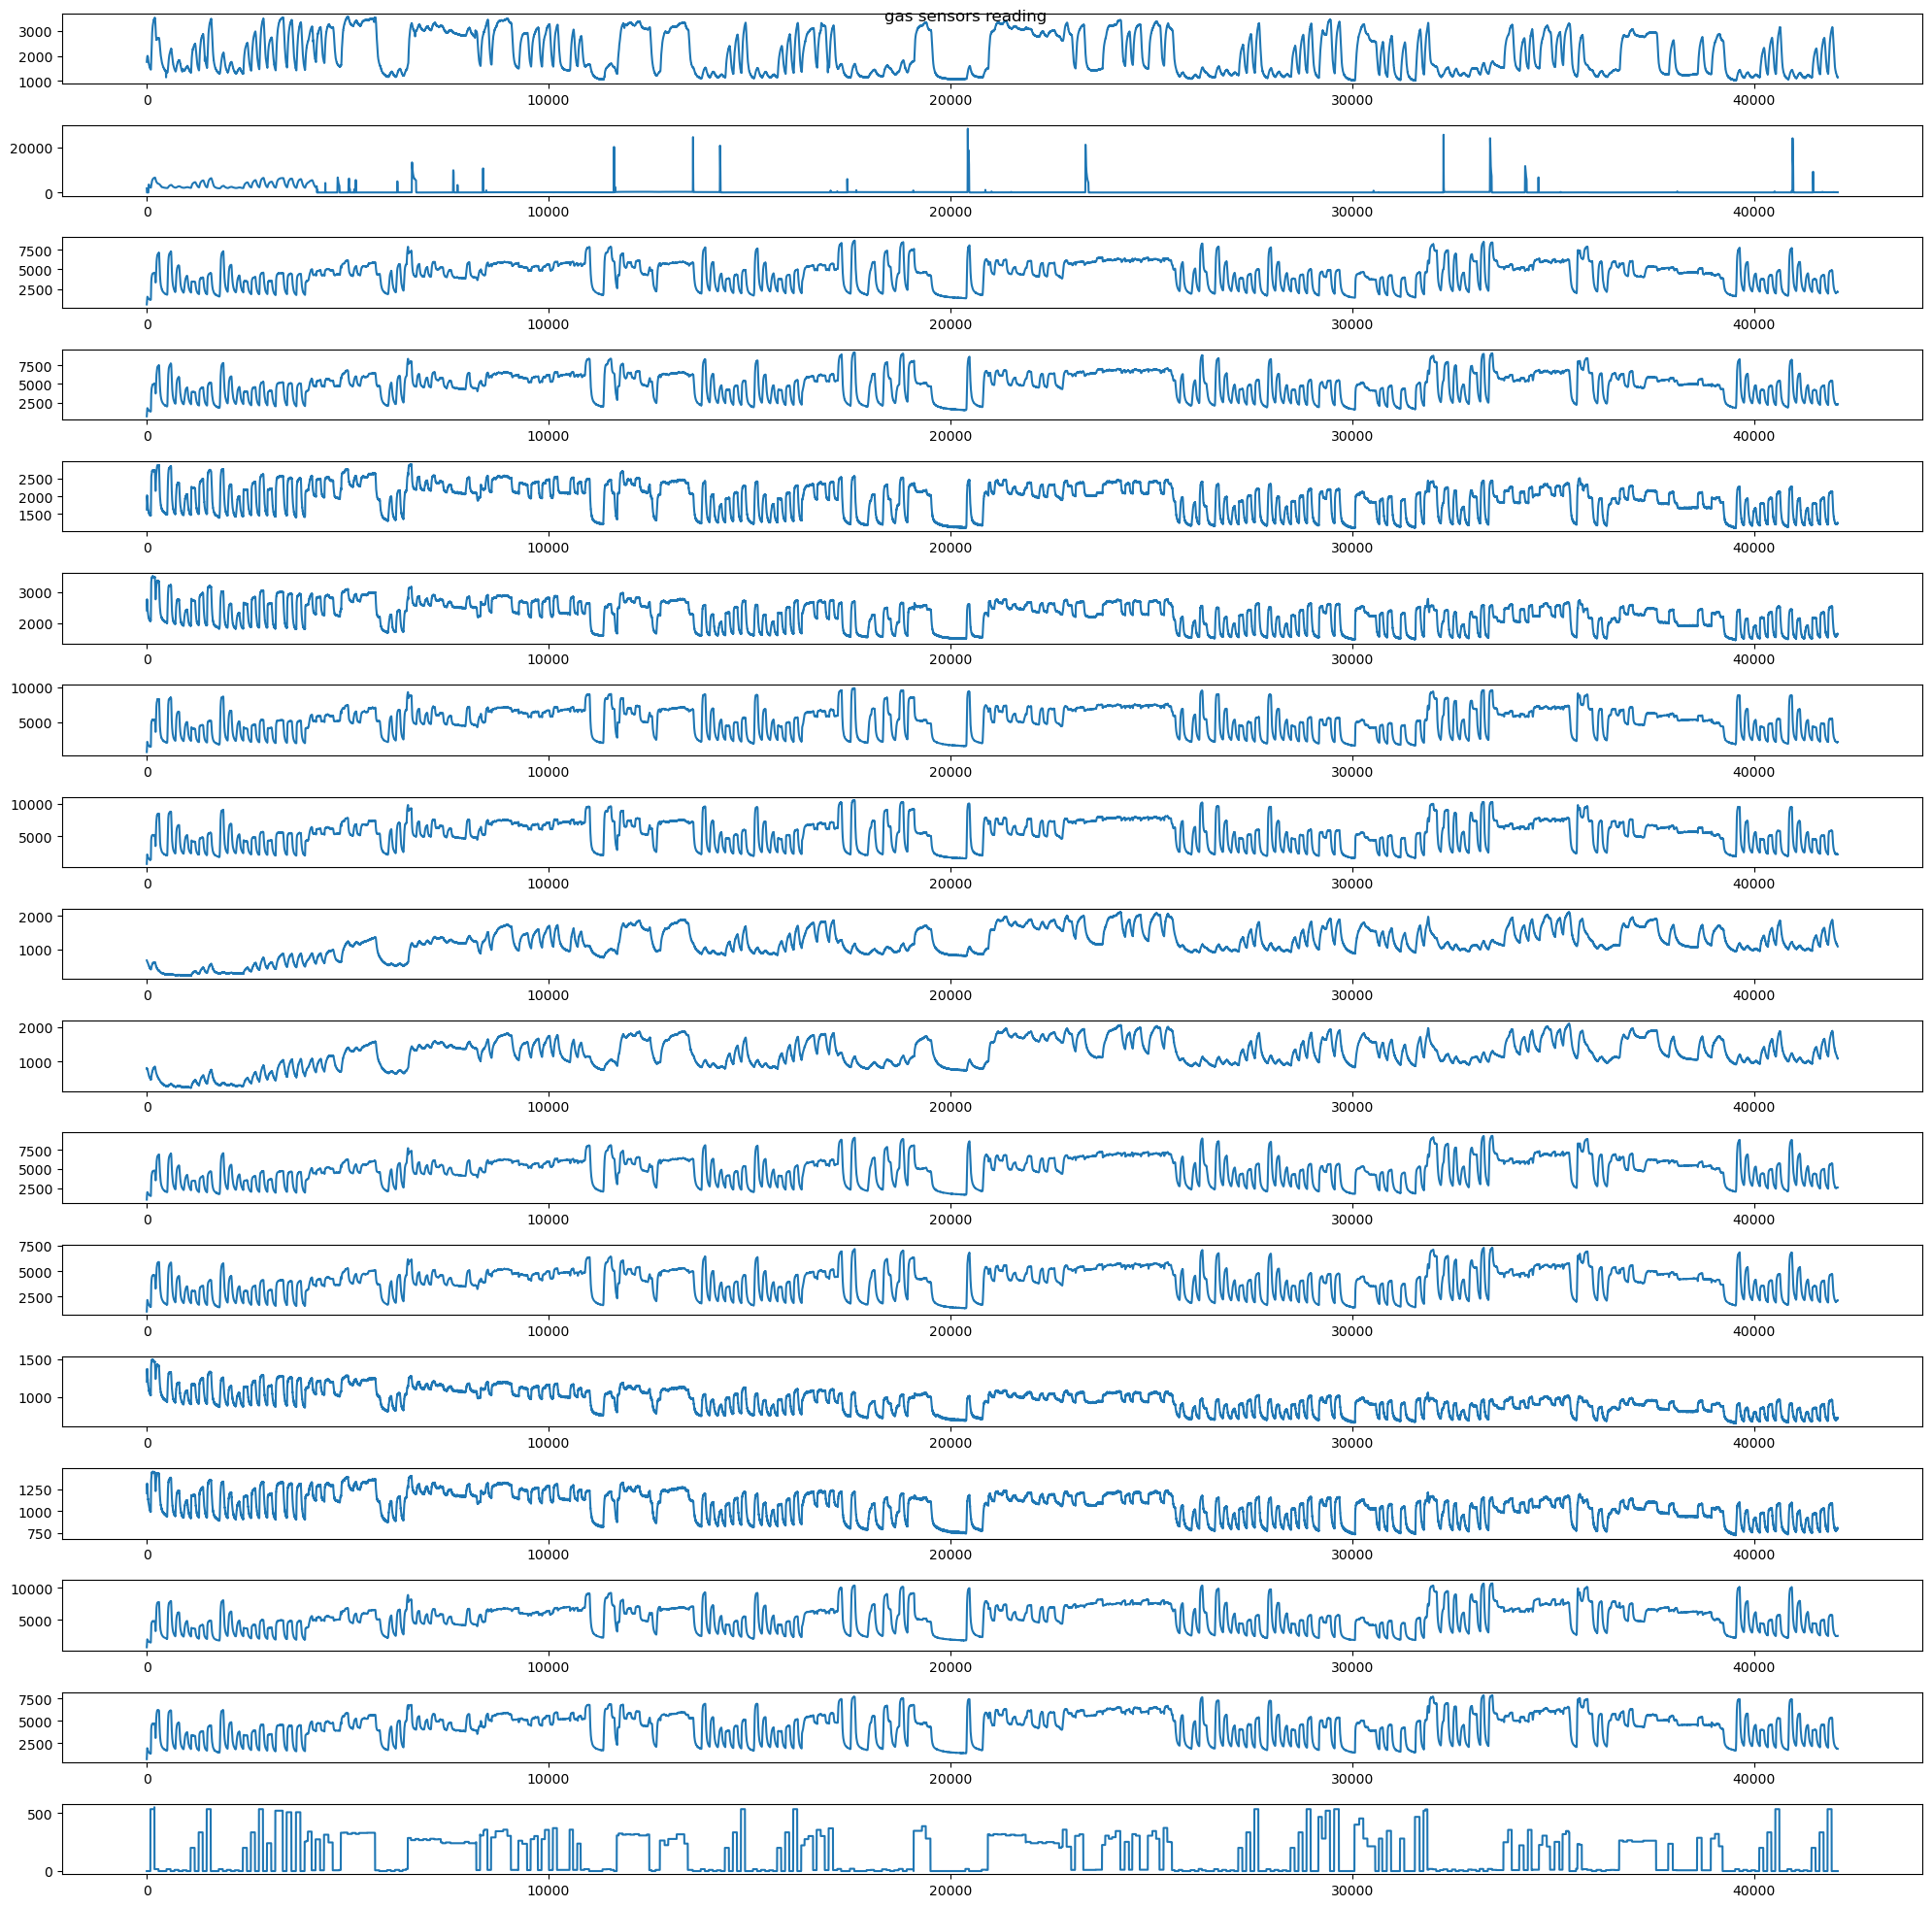

In [12]:
num_figures = len(df_seconds.columns)
fig, axs = plt.subplots(num_figures,figsize=(20, 20))
fig.suptitle('gas sensors reading')
for i in range(num_figures):
    axs[i].plot(df_seconds.iloc[0:,i])

plt.tight_layout()
plt.show()

In [13]:
n = len(df_seconds)
# Split 70:20:10 (train:validation:test)
train_df = df_seconds[0:int(n*0.7)]
val_df = df_seconds[int(n*0.7):int(n*0.9)]
test_df = df_seconds[int(n*0.9):]
train_df.shape, val_df.shape, test_df.shape

((29454, 17), (8416, 17), (4208, 17))

In [14]:
# Separate features (X) and target (y)
X_train = train_df.iloc[:, :16]
y_train = train_df.iloc[:, 16]

X_val = val_df.iloc[:, :16]
y_val = val_df.iloc[:, 16]

X_test = test_df.iloc[:, :16]
y_test = test_df.iloc[:, 16]

# Display the shapes of the resulting sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((29454, 16), (29454,), (8416, 16), (8416,), (4208, 16), (4208,))

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Display the shapes of the resulting scaled sets
X_train_scaled.shape, y_train_scaled.shape, X_val_scaled.shape, y_val_scaled.shape, X_test_scaled.shape, y_test_scaled.shape

((29454, 16), (29454, 1), (8416, 16), (8416, 1), (4208, 16), (4208, 1))

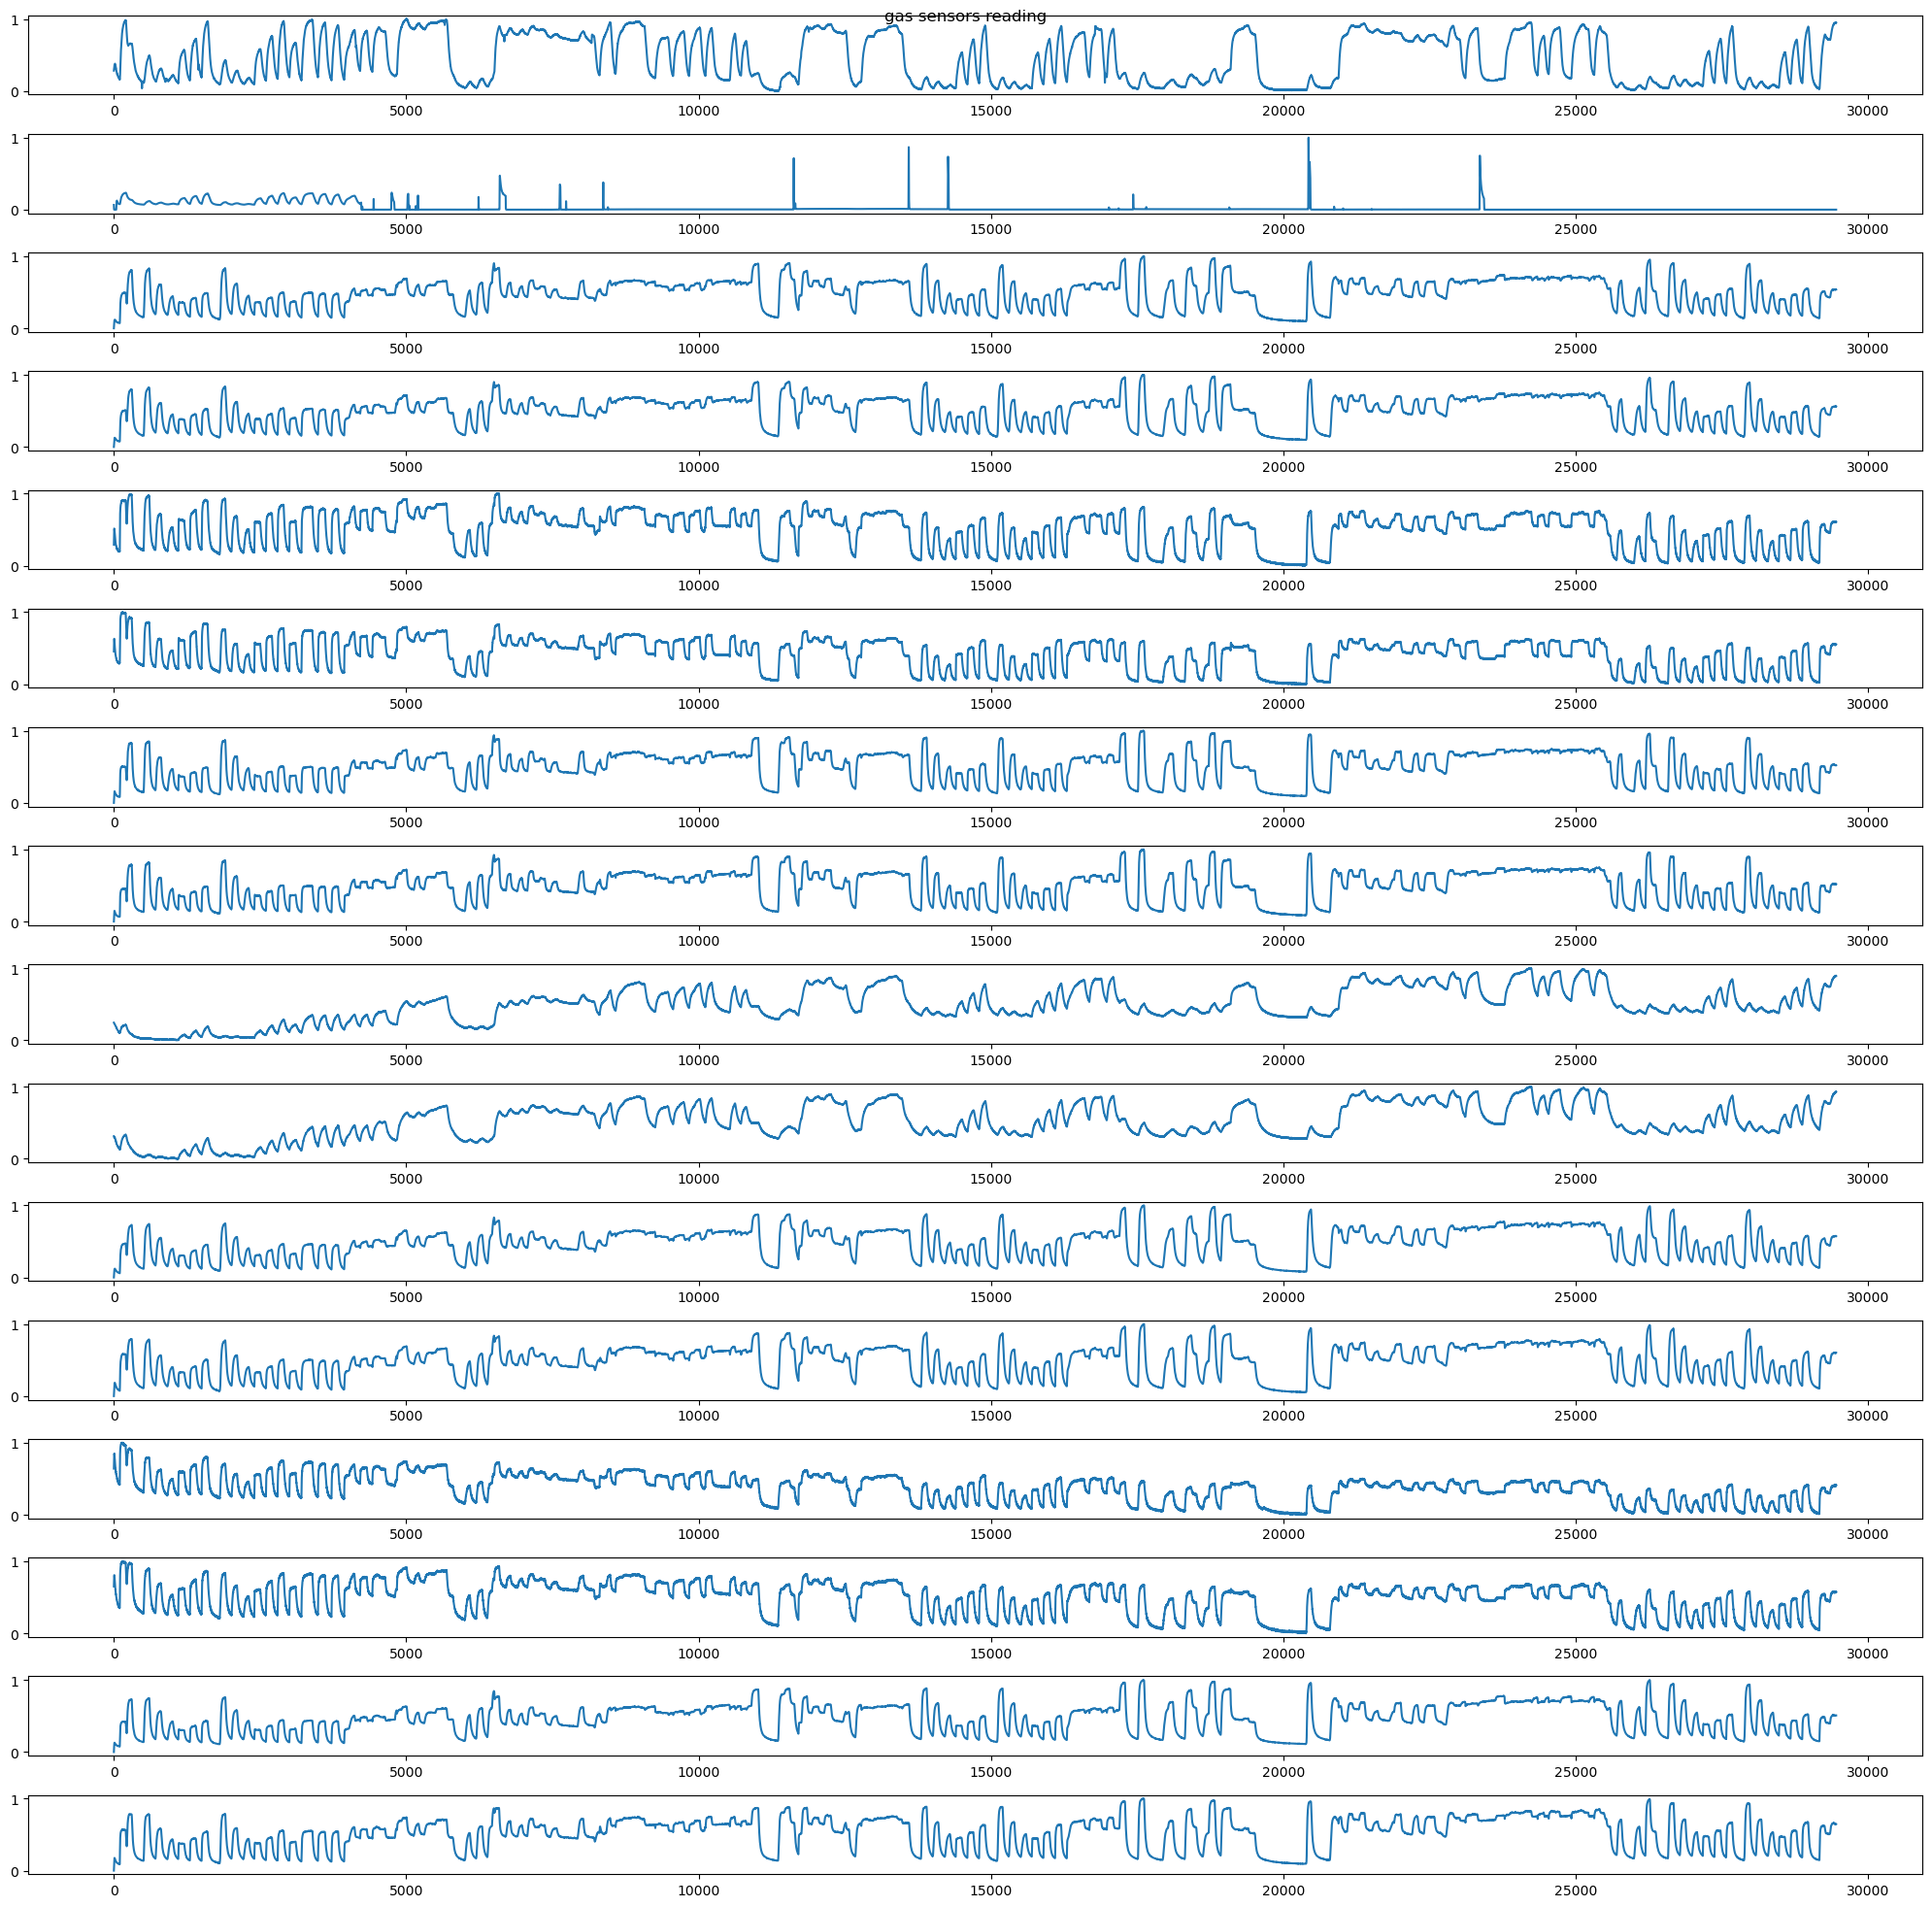

In [16]:
num_figures = len(X_train.columns)
fig, axs = plt.subplots(num_figures,figsize=(20, 20))
fig.suptitle('gas sensors reading')
for i in range(num_figures):
    axs[i].plot(X_train_scaled[0:,i])

plt.tight_layout()
plt.show()

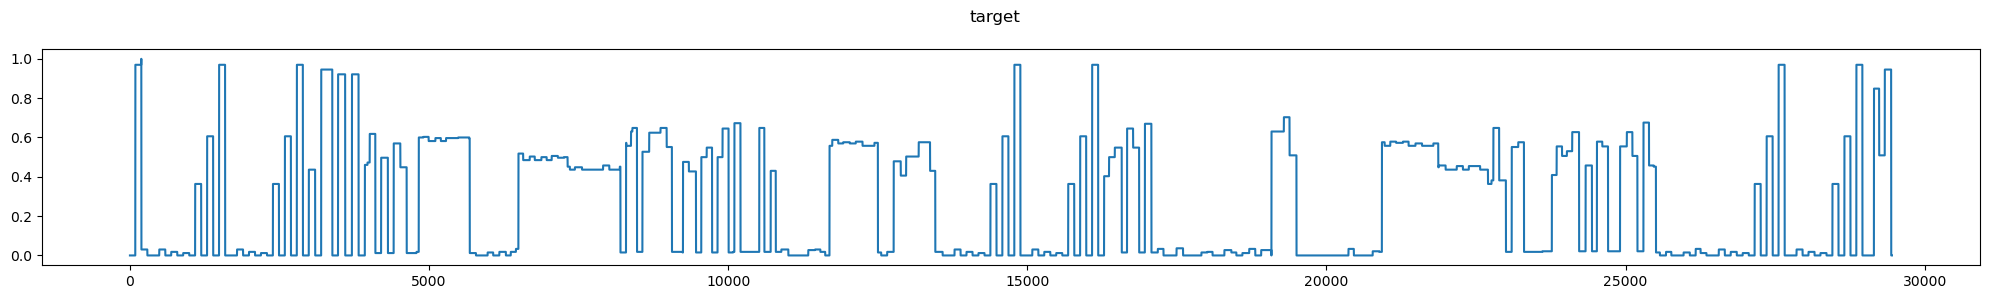

In [17]:
fig, ax = plt.subplots(figsize=(20, 3))
fig.suptitle('target')
ax.plot(y_train_scaled)

plt.tight_layout()
plt.show()

In [18]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor 1,29454.0,2187.084502,814.312952,1053.94,1405.2300,2059.355,3020.7425,3553.64
sensor 2,29454.0,687.970432,1665.988666,1.14,20.3900,82.050,205.3000,28116.51
sensor 3,29454.0,4441.034957,1603.773751,563.05,3087.1675,4557.520,5738.1100,8641.34
sensor 4,29454.0,4876.575211,1730.147581,659.08,3390.0725,5077.300,6266.0200,9221.02
sensor 5,29454.0,1991.344140,446.856945,1101.07,1582.1800,2093.060,2363.1700,2904.04
sensor 6,29454.0,2320.007095,442.211703,1488.62,1950.9800,2404.600,2670.5850,3502.11
sensor 7,29454.0,5188.768729,1970.641381,684.10,3378.6300,5297.090,6811.6900,9883.50
sensor 8,29454.0,5484.540800,2074.107902,832.73,3585.7850,5603.810,7211.5300,10521.04
sensor 9,29454.0,1149.091227,458.175979,194.30,876.0700,1111.910,1535.1025,2113.80
sensor 10,29454.0,1191.715349,434.455579,250.08,884.5500,1149.220,1559.7400,2054.39


## lets feed it to a MLP netwok

In [19]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input shape
input_shape = X_train.shape[1:]

# Input layer
input_layer = Input(shape=input_shape)
# First Dense layer
dense_layer_1 = Dense(64, activation='relu')(input_layer)
# Second Dense layer
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
# Output layer
output_layer = Dense(1)(dense_layer_2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.layers import Dropout

# Define the input shape
input_shape = X_train.shape[1:]

# Input layer
input_layer = Input(shape=input_shape)
# First Dense layer
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dropout_1 = Dropout(0.5)(dense_layer_1)
# Second Dense layer
dense_layer_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense_layer_2)
# Third Dense layer
dense_layer_3 = Dense(32, activation='relu')(dropout_2)
# Output layer
output_layer = Dense(1,activation='linear')(dense_layer_3)

# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer)
# Compile the model
model2.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Print the model summary
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# from keras import backend as K

# # Clear the Keras backend
# K.clear_session()

In [22]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=64, validation_data=(X_val_scaled,y_val_scaled))

Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - loss: 0.0409 - mae: 0.1337 - mse: 0.0409 - val_loss: 0.0384 - val_mae: 0.1338 - val_mse: 0.0384
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.0289 - mae: 0.1058 - mse: 0.0289 - val_loss: 0.0289 - val_mae: 0.1108 - val_mse: 0.0289
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.0259 - mae: 0.0959 - mse: 0.0259 - val_loss: 0.0275 - val_mae: 0.1054 - val_mse: 0.0275
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.0248 - mae: 0.0928 - mse: 0.0248 - val_loss: 0.0288 - val_mae: 0.1094 - val_mse: 0.0288
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.0223 - mae: 0.0842 - mse: 0.0223 - val_loss: 0.0269 - val_mae: 0.1068 - val_mse: 0.0269
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.0224 - mae: 0.0836 - mse: 0.0224 - val_loss: 0.0259 - val_mae: 0.1012 - val_mse: 0.0259
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.0219 - mae: 0.0818 - mse

In [24]:
loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Set Loss: {loss}')

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.0184 - mae: 0.0834 - mse: 0.0184
Test Set Loss: [0.02515997551381588, 0.0913747102022171, 0.02515997551381588]


In [25]:
y_pred = model.predict(X_test_scaled)
print(y_pred.shape) 

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
(4208, 1)


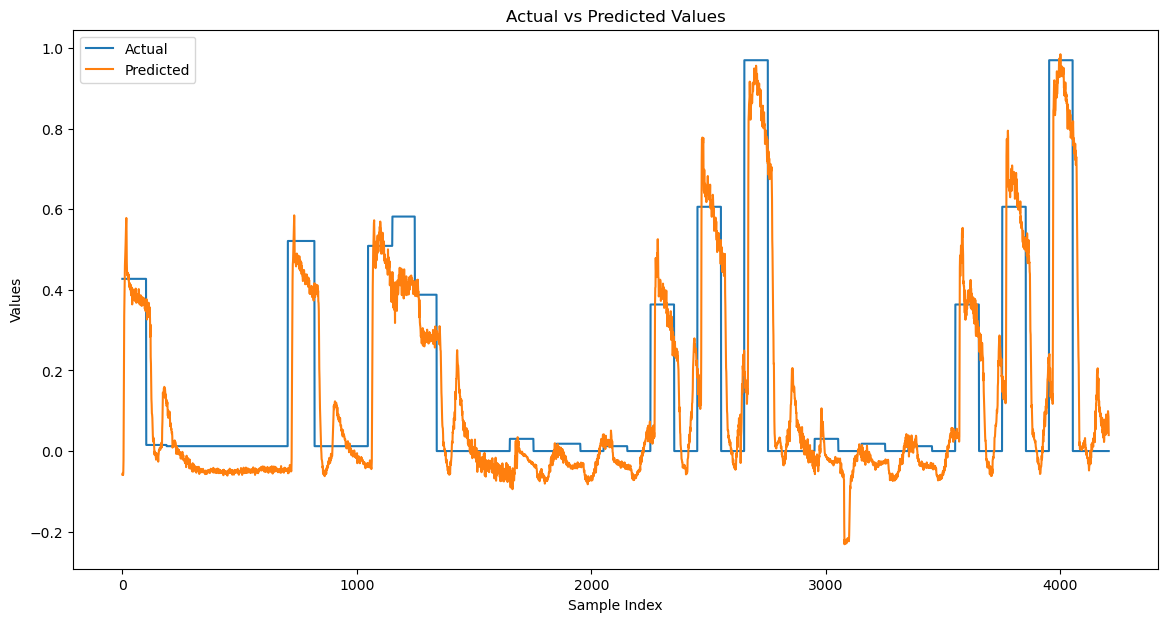

In [27]:
plt.figure(figsize=(14, 7))

plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [28]:
history2 = model2.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=64, validation_data=(X_val_scaled,y_val_scaled))

Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - loss: 0.0637 - mae: 0.1873 - mse: 0.0637 - val_loss: 0.0431 - val_mae: 0.1297 - val_mse: 0.0431
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.0362 - mae: 0.1202 - mse: 0.0362 - val_loss: 0.0351 - val_mae: 0.1153 - val_mse: 0.0351
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0308 - mae: 0.1031 - mse: 0.0308 - val_loss: 0.0278 - val_mae: 0.0904 - val_mse: 0.0278
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.0290 - mae: 0.0978 - mse: 0.0290 - val_loss: 0.0302 - val_mae: 0.1079 - val_mse: 0.0302
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.0277 - mae: 0.0932 - mse: 0.0277 - val_loss: 0.0293 - val_mae: 0.1007 - val_mse: 0.0293
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.0276 - mae: 0.0934 - mse: 0.0276 - val_loss: 0.0271 - val_mae: 0.0944 - val_mse: 0.0271
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0281 - mae: 0.0929 - mse

In [30]:
loss = model2.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Set Loss: {loss}')

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - loss: 0.0172 - mae: 0.0714 - mse: 0.0172
Test Set Loss: [0.02716289646923542, 0.08963672816753387, 0.02716289646923542]


In [31]:
y_pred = model2.predict(X_test_scaled)
print(y_pred.shape) 

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
(4208, 1)


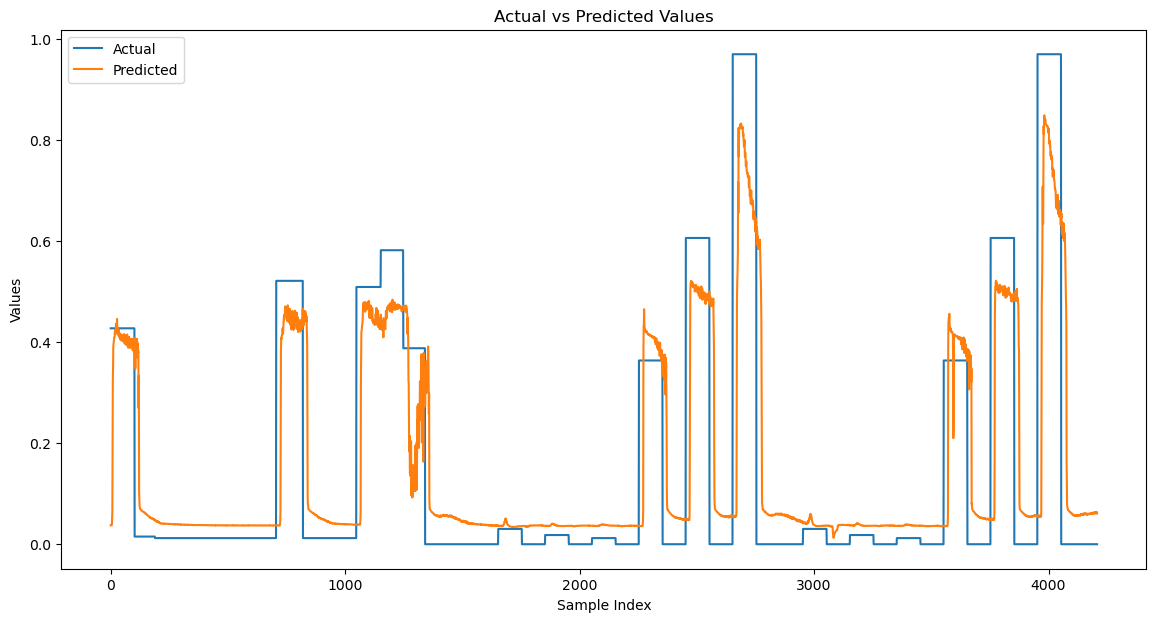

In [32]:
plt.figure(figsize=(14, 7))

plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()